> The top node colored with red in each graph refers to the overall scope of the corresponding graph. All the other red-colored nodes included in each graph are callers to other scopes.

> The green-colored nodes represent parameters that will be passed around scopes.

## Create absorption workspace routine

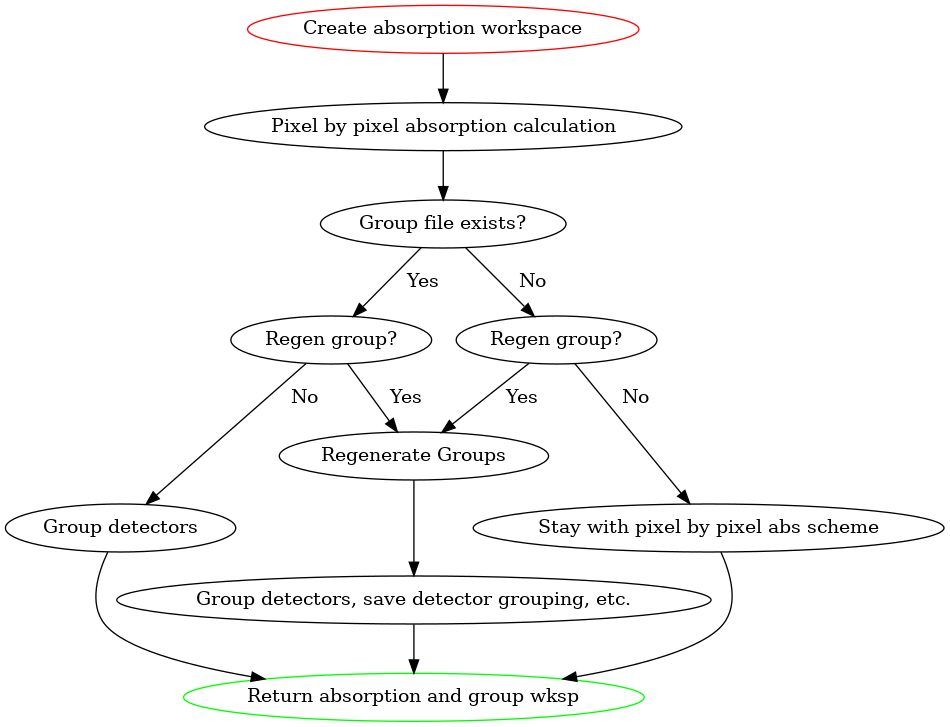

In [27]:
digraph G {
 {node[color=red];"Create absorption workspace"} -> "Pixel by pixel absorption calculation";
 "Pixel by pixel absorption calculation" -> "Group file exists?";
 "Group file exists?" -> {node[label="Regen group?"];"regen_g_1"} [label="  Yes"];
 {node[label="Regen group?"];"regen_g_1"} -> "Regenerate Groups" [label="  Yes"];
 "Regenerate Groups" -> "Group detectors, save detector grouping, etc.";
 "Group detectors, save detector grouping, etc." -> {node[color=green];"Return absorption and group wksp"};
 {node[label="Regen group?"];"regen_g_1"} -> "Group detectors" [label="  No"];
 "Group detectors" -> "Return absorption and group wksp";
 "Group file exists?" -> {node[label="Regen group?"];"regen_g_2"} [label="  No"];
 {node[label="Regen group?"];"regen_g_2"} -> "Regenerate Groups" [label="  Yes"];
 {node[label="Regen group?"];"regen_g_2"} -> "Stay with pixel by pixel abs scheme" [label="  No"];
 "Stay with pixel by pixel abs scheme" -> {node[color=green];"Return absorption and group wksp"};
}

## Sample and Container absorption processing

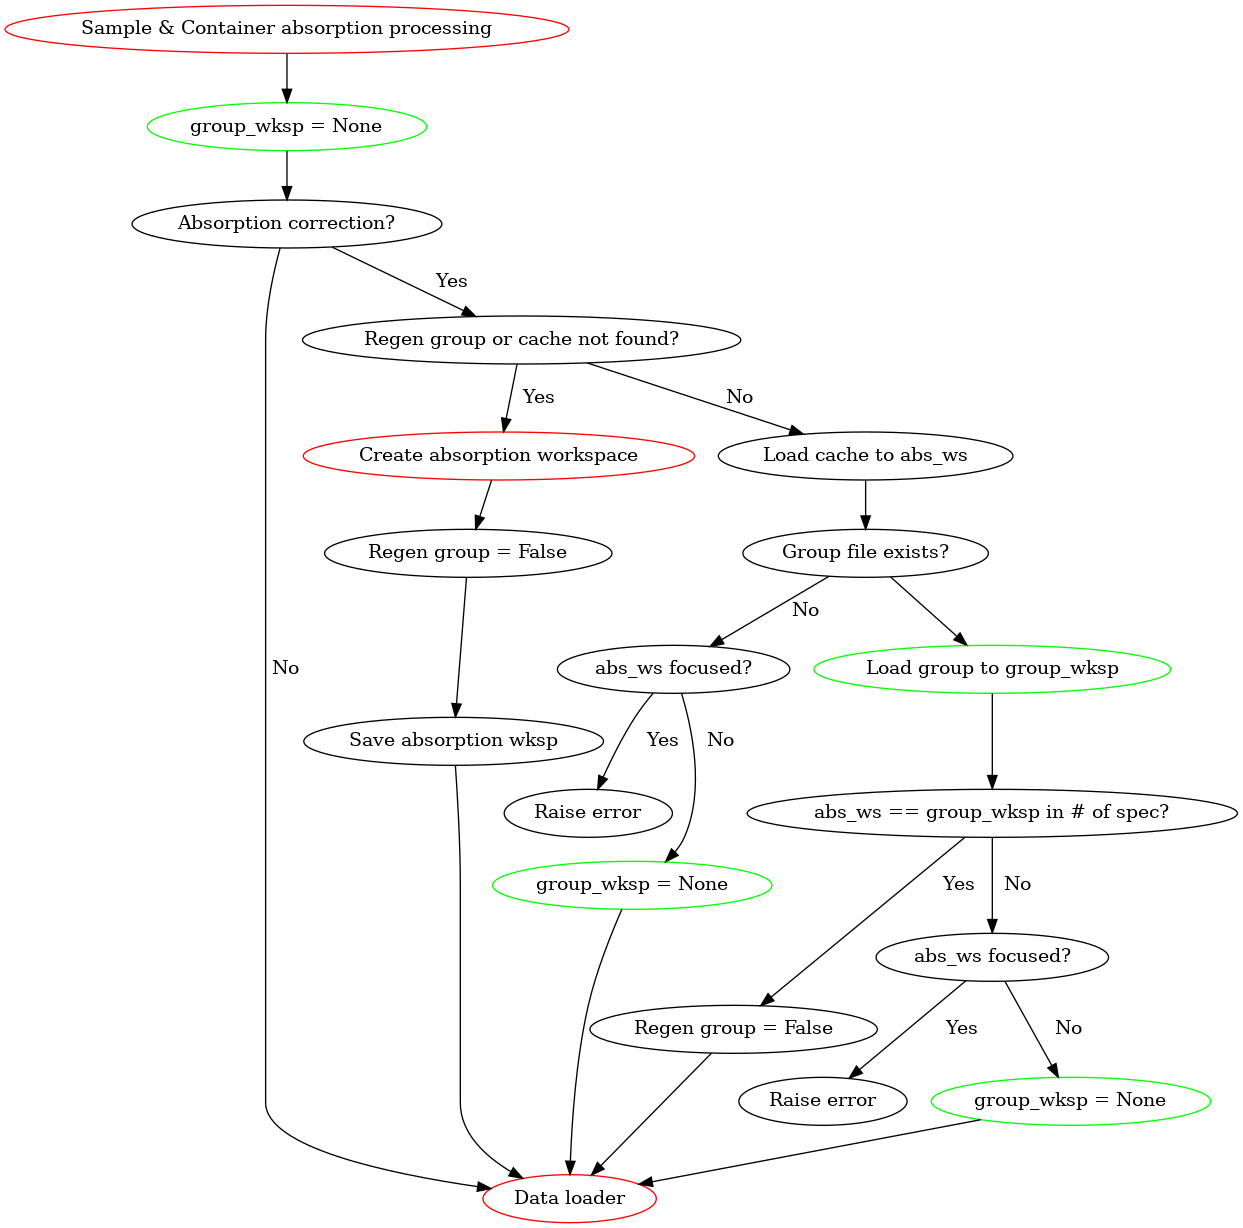

In [45]:
digraph G {
 {node[color=red]; "Sample & Container absorption processing"} -> {node[color=green];"group_wksp = None"};
 {node[color=green];"group_wksp = None"} -> "Absorption correction?";
 "Absorption correction?" -> {node[color=red]; "Data loader"} [label=" No"];
 "Absorption correction?" -> "Regen group or cache not found?" [label="   Yes"];
 "Regen group or cache not found?" -> {node[color=red];"Create absorption workspace"} [label="  Yes"];
 {node[color=red];"Create absorption workspace"} -> {node[label="Regen group = False"];"regen_group_f_2"};
 {node[label="Regen group = False"];"regen_group_f_2"} -> "Save absorption wksp";
 "Save absorption wksp" -> {node[color=red]; "Data loader"};
 "Regen group or cache not found?" -> "Load cache to abs_ws" [label="  No"];
 "Load cache to abs_ws" -> {node[label="Group file exists?"];"gf_exists_1"};
 {node[label="Group file exists?"];"gf_exists_1"} -> "abs_ws focused?" [label="  No"];
 "abs_ws focused?" -> "Raise error" [label="  Yes"];
 "abs_ws focused?" -> {node[label="group_wksp = None";color=green];"group_wksp_none_1"} [label="  No"];
 {node[label="group_wksp = None";color=green];"group_wksp_none_1"} -> {node[color=red]; "Data loader"};
 {node[label="Group file exists?"];"gf_exists_1"} -> {node[color=green];"Load group to group_wksp"};
 {node[color=green];"Load group to group_wksp"} -> "abs_ws == group_wksp in # of spec?";
 "abs_ws == group_wksp in # of spec?" -> "Regen group = False" [label="  Yes"];
 "Regen group = False" -> {node[color=red]; "Data loader"};
 "abs_ws == group_wksp in # of spec?" -> {node[label="abs_ws focused?"];"abs_ws_focused_1"} [label="  No"];
 {node[label="abs_ws focused?"];"abs_ws_focused_1"} -> {node[label="Raise error"];"raise_err_1"} [label="  Yes"];
 {node[label="abs_ws focused?"];"abs_ws_focused_1"} -> {node[label="group_wksp = None";color=green];"group_wksp_none_2"} [label="  No"];
 {node[label="group_wksp = None";color=green];"group_wksp_none_2"} -> {node[color=red]; "Data loader"};
}

## Vanadium absorption processing

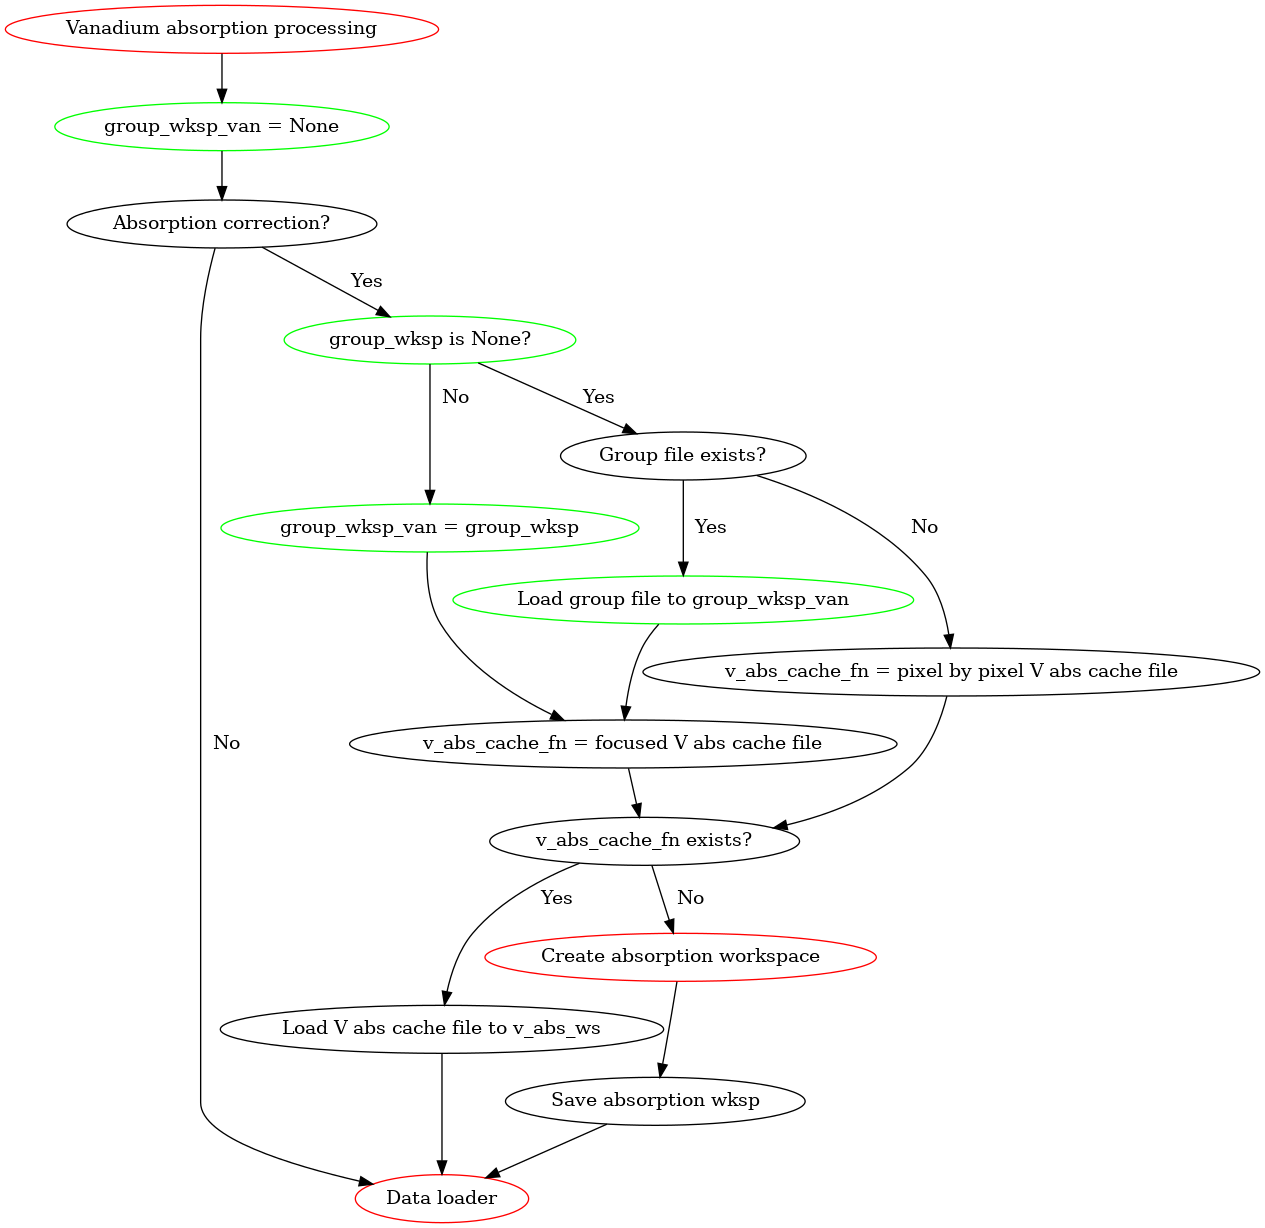

In [46]:
digraph G {
    {node[color=red]; "Vanadium absorption processing"} -> {node[color=green];"group_wksp_van = None"};
    {node[color=green];"group_wksp_van = None"} -> "Absorption correction?";
    "Absorption correction?" -> {node[color=red];"Data loader"} [label="  No"];
    "Absorption correction?" -> {node[color=green];"group_wksp is None?"} [label="  Yes"];
    {node[color=green];"group_wksp is None?"} -> {node[color=green];"group_wksp_van = group_wksp"} [label="  No"];
    {node[color=green];"group_wksp_van = group_wksp"} -> "v_abs_cache_fn = focused V abs cache file";
    "v_abs_cache_fn = focused V abs cache file" -> "v_abs_cache_fn exists?";
    {node[color=green];"group_wksp is None?"} -> "Group file exists?" [label="  Yes"];
    "Group file exists?" -> {node[color=green];"Load group file to group_wksp_van"} [label="  Yes"];
    {node[color=green];"Load group file to group_wksp_van"} -> "v_abs_cache_fn = focused V abs cache file";
    "Group file exists?" -> "v_abs_cache_fn = pixel by pixel V abs cache file" [label="  No"];
    "v_abs_cache_fn = pixel by pixel V abs cache file" -> "v_abs_cache_fn exists?";
    "v_abs_cache_fn exists?" -> "Load V abs cache file to v_abs_ws" [label="   Yes"];
    "Load V abs cache file to v_abs_ws" -> {node[color=red];"Data loader"};
    "v_abs_cache_fn exists?" -> {node[color=red];"Create absorption workspace"} [label="  No"];
    {node[color=red];"Create absorption workspace"} -> "Save absorption wksp";
    "Save absorption wksp" -> {node[color=red];"Data loader"};
}

## Data loader

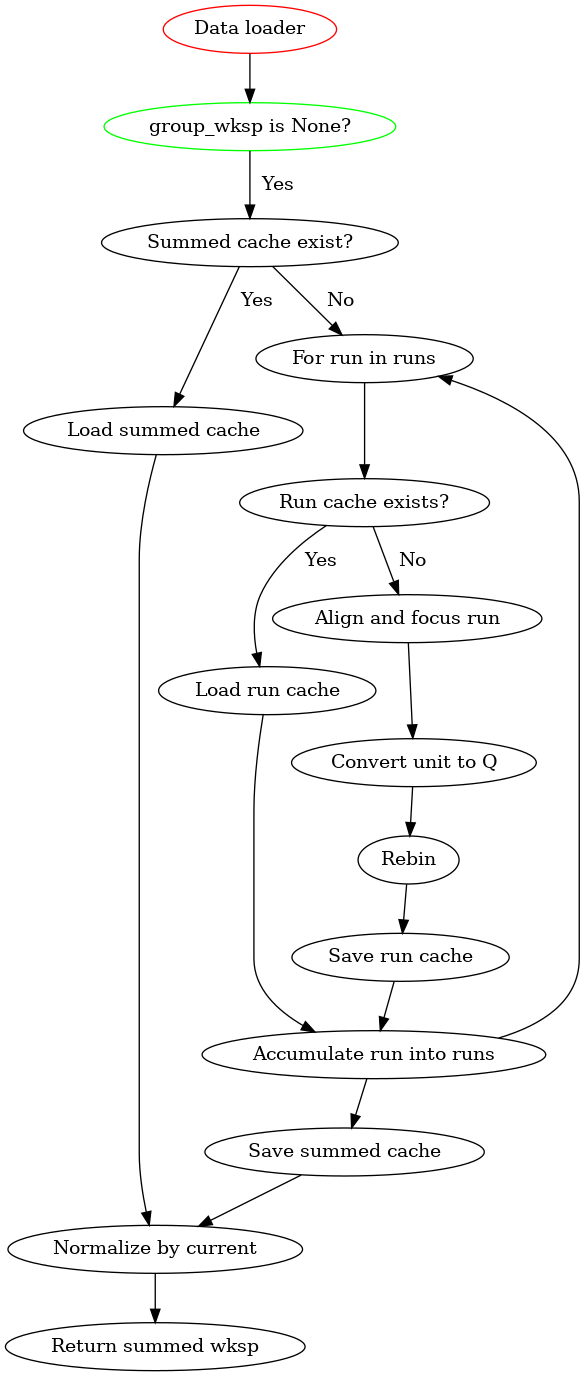

In [61]:
digraph G {
    {node[color=red];"Data loader"} -> {node[color=green];"group_wksp is None?"};   
    {node[color=green];"group_wksp is None?"} -> "Summed cache exist?" [label="  Yes"];
    "Summed cache exist?" -> "Load summed cache" [label="  Yes"];
    "Load summed cache" -> "Normalize by current";
    "Normalize by current" -> "Return summed wksp";
    "Summed cache exist?" -> "For run in runs" [label="  No"];
    "For run in runs" -> "Run cache exists?";
    "Run cache exists?" -> "Load run cache" [label="  Yes"];
    "Load run cache" -> "Accumulate run into runs";
    "Accumulate run into runs" -> "Save summed cache";
    "Run cache exists?" -> "Align and focus run" [label="  No"];
    "Align and focus run" -> "Convert unit to Q";
    "Convert unit to Q" -> "Rebin";
    "Rebin" -> "Save run cache";
    "Save run cache" -> "Accumulate run into runs";
    "Accumulate run into runs" -> "For run in runs";
    "Save summed cache" -> "Normalize by current";
}